In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions import train_test, RMSE, MAE
from matrix_factorization import basic_MF, bias_MF

In [2]:
rating_df = pd.read_csv('data/user_rating.csv')

In [3]:
R = np.array(rating_df)

In [4]:
known = []
for u in range(R.shape[0]):
    for i in range(R.shape[1]):
        if R[u,i] > 0:
            known.append((u, i))

In [6]:
training, testing = train_test(known)

In [27]:
basic_results = {'reg': [],
                'features': [],
                'RMSE': []}

features = [5, 10, 12, 15, 20, 25]

In [28]:
reg_value = 0.1

for f in features:
    P, Q = basic_MF(R, training, latent_features=f, reg=reg_value, steps = 75)
    R_pred = np.dot(P,Q.T)
        
    basic_results['reg'].append(reg_value)
    basic_results['features'].append(f)
    basic_results['RMSE'].append(RMSE(R, R_pred, testing))

In [31]:
reg_value = 0.15

for f in features:
    P, Q = basic_MF(R, training, latent_features=f, reg=reg_value, steps = 75)
    R_pred = np.dot(P,Q.T)
        
    basic_results['reg'].append(reg_value)
    basic_results['features'].append(f)
    basic_results['RMSE'].append(RMSE(R, R_pred, testing))

In [32]:
reg_value = 0.2

for f in features:
    P, Q = basic_MF(R, training, latent_features=f, reg=reg_value, steps = 75)
    R_pred = np.dot(P,Q.T)
        
    basic_results['reg'].append(reg_value)
    basic_results['features'].append(f)
    basic_results['RMSE'].append(RMSE(R, R_pred, testing))

In [33]:
basic_results_df = pd.DataFrame(basic_results)

In [34]:
basic_results_df.pivot_table(index='reg', columns='features', values='RMSE')

features,5,10,12,15,20,25
reg,,,,,,
0.10,0.932758,0.901074,0.901615,0.895426,0.899751,0.906025
0.15,0.936589,0.903726,0.897487,0.896855,0.901222,0.919514
0.20,0.949668,0.916292,0.910579,0.910535,0.915250,0.931300


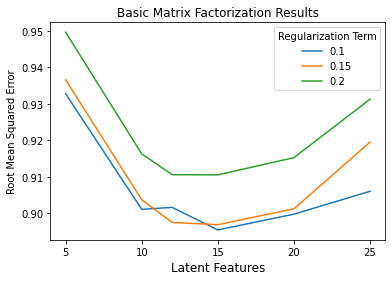

In [81]:
reg_values = basic_results_df['reg'].unique()
feature_values = basic_results_df['features'].unique()

for reg in reg_values:
    data = basic_results_df[basic_results_df['reg'] == reg]

    plt.plot(data['features'], data['RMSE'], label=reg)
    
plt.legend( title='Regularization Term')

plt.title('Basic Matrix Factorization Results')
plt.xlabel('Latent Features', size=12)
plt.ylabel('Root Mean Squared Error')

plt.xticks(np.arange(min(feature_values), max(feature_values)+1, 5.0))

plt.show()

In [82]:
bais_results = {'reg': [],
                'features': [],
                'RMSE': []}

features = [5, 25, 50, 100, 150, 200]

In [111]:
reg_value = 0.1

for f in features:
    P, Q, avg_rating, bias_user, bias_movie = bias_MF(R, training, steps=100, latent_features=f, reg=reg_value)
    R_pred = np.dot(P,Q.T) + avg_rating + bias_user.reshape(-1,1) + bias_movie.reshape(1,-1)
        
    bais_results['reg'].append(reg_value)
    bais_results['features'].append(f)
    bais_results['RMSE'].append(RMSE(R, R_pred, testing))

In [96]:
reg_value = 0.15

for f in features:
    P, Q, avg_rating, bias_user, bias_movie = bias_MF(R, training, steps=100, latent_features=f, reg=reg_value)
    R_pred = np.dot(P,Q.T) + avg_rating + bias_user.reshape(-1,1) + bias_movie.reshape(1,-1)
        
    bais_results['reg'].append(reg_value)
    bais_results['features'].append(f)
    bais_results['RMSE'].append(RMSE(R, R_pred, testing))

In [99]:
reg_value = 0.2

for f in features:
    P, Q, avg_rating, bias_user, bias_movie = bias_MF(R, training, steps=100, latent_features=f, reg=reg_value)
    R_pred = np.dot(P,Q.T) + avg_rating + bias_user.reshape(-1,1) + bias_movie.reshape(1,-1)
        
    bais_results['reg'].append(reg_value)
    bais_results['features'].append(f)
    bais_results['RMSE'].append(RMSE(R, R_pred, testing))

In [112]:
bais_results_df = pd.DataFrame(bais_results)

In [132]:
bais_results_df.sort_values('RMSE')

,reg,features,RMSE
14,0.15,100,0.854609
15,0.15,150,0.854882
13,0.15,50,0.855451
26,0.10,100,0.855586
16,0.15,200,0.856411
28,0.10,200,0.857085
25,0.10,50,0.857327
27,0.10,150,0.858168
12,0.15,25,0.858217
24,0.10,25,0.859957


In [124]:
bais_results_df.pivot_table(index='reg', columns='features', values='RMSE')

features,5,25,50,100,150,200
reg,,,,,,
0.10,0.873021,0.859957,0.857327,0.855586,0.858168,0.857085
0.15,0.862984,0.858217,0.855451,0.854609,0.854882,0.856411
0.20,0.869930,0.861346,0.861781,0.860638,0.862050,0.863826


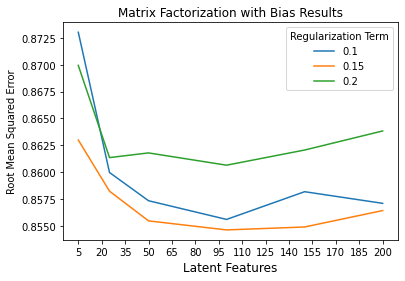

In [129]:
reg_values = bais_results_df['reg'].unique()
feature_values = bais_results_df['features'].unique()

for reg in reg_values:
    data = bais_results_df[bais_results_df['reg'] == reg]

    plt.plot(data['features'], data['RMSE'], label=reg)
    
plt.legend( title='Regularization Term')

plt.title('Matrix Factorization with Bias Results')
plt.xlabel('Latent Features', size=12)
plt.ylabel('Root Mean Squared Error')

plt.xticks(np.arange(min(feature_values), max(feature_values)+1, 15))

plt.show()